In [2]:
# Import the required packages from the qlbm framework
from qlbm.components import (
    CQLBM,
    CollisionlessStreamingOperator,
    ControlledIncrementer,
    SpecularReflectionOperator,
    SpeedSensitivePhaseShift,
)
from qlbm.lattice import CollisionlessLattice
from qlbm.tools.utils import create_directory_and_parents

In [3]:
# Create directory to which the output files will be stored
root_directory = "qlbm-output/visualization_components"
create_directory_and_parents(root_directory)

In [4]:
# Define an example which uses 4 velocity qubits and the qubits with speed 2 will stream
speed_shift_primitive: SpeedSensitivePhaseShift = SpeedSensitivePhaseShift(
    4, 2, True
)

In [5]:
# You can draw circuits in Qiskit's ASCII art format
speed_shift_primitive.draw("text", f"{root_directory}/phase_shift.txt")

┌────────┐
q_0: ┤ P(π/4) ├
     ├────────┤
q_1: ┤ P(π/2) ├
     └┬──────┬┘
q_2: ─┤ P(π) ├─
      ├──────┤ 
q_3: ─┤ P(0) ├─
      └──────┘

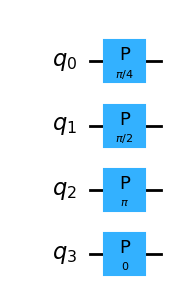

In [6]:
# Also through Qiskit's Matplotlib interface
speed_shift_primitive.draw("mpl", f"{root_directory}/phase_shift.pdf")

In [7]:
# Can also export directly to Latex source
speed_shift_primitive.draw("latex_source", f"{root_directory}/phase_shift.tex")

'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{q}_{0} :  } & \\lstick{{q}_{0} :  } & \\gate{\\mathrm{P}\\,(\\mathrm{\\frac{\\pi}{4}})} & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{1} :  } & \\lstick{{q}_{1} :  } & \\gate{\\mathrm{P}\\,(\\mathrm{\\frac{\\pi}{2}})} & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{2} :  } & \\lstick{{q}_{2} :  } & \\gate{\\mathrm{P}\\,(\\mathrm{\\pi})} & \\qw & \\qw\\\\\n\t \t\\nghost{{q}_{3} :  } & \\lstick{{q}_{3} :  } & \\gate{\\mathrm{P}\\,(\\mathrm{0})} & \\qw & \\qw\\\\\n\\\\ }}\n\\end{document}'

In [8]:
# Now import a lattice for which we build operators and algorithms
example_lattice = CollisionlessLattice("demos/lattices/2d_8x8_1_obstacle.json")

FileNotFoundError: [Errno 2] No such file or directory: 'demos/lattices/2d_8x8_1_obstacle.json'

In [ ]:
# All primitives can be drawn to the same interface
ControlledIncrementer(example_lattice, reflection=False).draw(
    "mpl", f"{root_directory}/controlled_incrementer.pdf"
)

In [ ]:
# All operators can be drawn the same way
CollisionlessStreamingOperator(example_lattice, [0, 2, 3]).draw(
    "mpl", f"{root_directory}/streaming.pdf"
)

In [ ]:
SpecularReflectionOperator(
    example_lattice, example_lattice.blocks["bounceback"]
).draw("mpl", f"{root_directory}/specular_reflection.pdf")

In [ ]:
# As can entire algorithms
CQLBM(example_lattice).draw("mpl", f"{root_directory}/collisionless_lbm.pdf")